# WEEK 13 IN-MODULE EXERCISES - PART I OF PRECIP + SST EXPLORATION!

### What is El Nino and why do we care?
- remember: El Nino (La Nina) is the anomalous warming (cooling) of a certain region in the Pacific Ocean
<br><br>
- interestingly, what happens there can have far reaching impacts on our weather here (example: precipitation patterns in the US, track of low pressure systems, etc!) - as well as weather *globally*
<br><br>
- more scientific background? https://oceanservice.noaa.gov/facts/ninonina.html.

### How do we evaluate El Nino vs. La Nina?
**Spatially**
- the average sea-surface temperature (SST) anomalies in the Nino 3.4 region (5S to 5N, 120W to 170W), seen below 
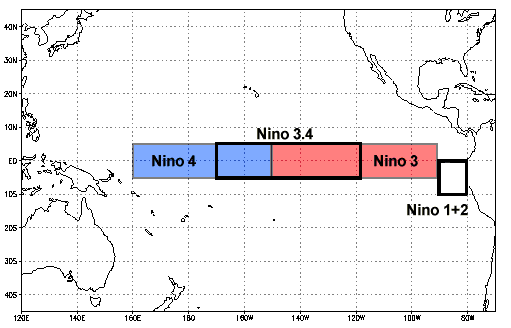
- if can't see above image, or for more information, see: https://www.ncdc.noaa.gov/teleconnections/enso/indicators/sst/

**Temporally**
- 5 consecutive months with 3-month running mean SST anomaly of a least 0.5 deg C (El Nino) or below -0.5 deg C (La Nina)

### On this assignment, you'll be analyzing correlations between precipitation and SST anomalies and precipitation elsewhere!

### (1)  Read in and initially process your data
*Data*
- precip: precip.mon.anom.nc
- SST: sst.mon.anom.nc

*Initial processing*
- for guidance on what is necessary, processing-wise: print out the coordinates of each variable, and keep in mind you'll want to be able to align these variables in your analysis.  Then, process accordingly!
- hint: NO merger necessary!

In [78]:
import pandas as pd
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
import cartopy.feature as cfeature
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import numpy as np


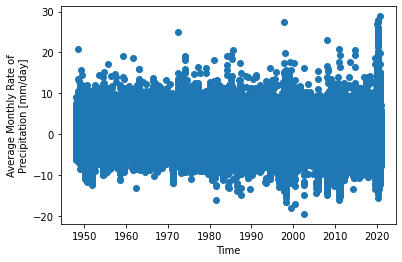

In [84]:
precip_ds = xr.open_dataset('data/week13/precip.mon.anom.nc')
sst_ds = xr.open_dataset('data/week13/sst.mon.anom.nc')
sst_ds = sst_ds.sortby('lat', ascending=False)

precip_ds.plot.scatter(x='time', y='precip')

### (2)  Averaging, smoothing, and plotting
#### (a) Take a spatial average over the Nino 3.4 region






slice(0, 360, None)
slice(-90, 90, None)



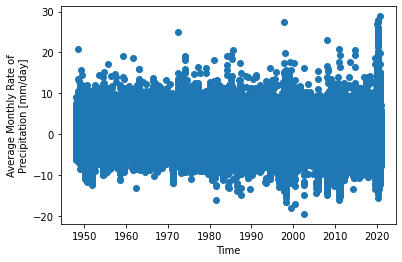

In [89]:
# Define a bounding box
# lon_l = 185
# lon_u = 211
# lat_l = -5
# lat_u = 5

lon_l = 0
lon_u = 360
lat_l = -90
lat_u = 90

lons = slice(lon_l, lon_u)
print(lons)
lats = slice(lat_l, lat_u)
print(lats)
print()

ds_34_subset = precip_ds.where(
    (lon_l < precip_ds.lon) & (precip_ds.lon < lon_u) & 
    (lat_l < precip_ds.lat) & (precip_ds.lat < lat_u),
    drop=True
)
ds_34_subset.plot.scatter(x='time', y='precip')

#### (b)  And then a 3-month rolling mean of the resulting spatially-averaged data, saved to a new variable
- There is functionality in Xarray for this comparable to Pandas!

In [86]:
ds_34_sm = ds_34_subset.rolling(time=3).mean()

#### (c)  Now, PLOT this data you produced in (b) against that in (a) - without the rolling mean
- it should be a time series and look something like this (you don't have to fill in curves though): https://www.ncdc.noaa.gov/monitoring-content/teleconnections/eln-f-pg.gif
- you should, however, add a horizontal line passing through y = 0 so your plot is easier to interpret!
- as well as color-coded lines for the El Nino and La Nina thresholds

876
876
<class 'xarray.core.dataarray.DataArray'>   <class 'xarray.core.dataarray.DataArray'>
<xarray.DataArray 'time' (time: 876)>
array(['1948-01-01T00:00:00.000000000', '1948-02-01T00:00:00.000000000',
       '1948-03-01T00:00:00.000000000', ..., '2020-10-01T00:00:00.000000000',
       '2020-11-01T00:00:00.000000000', '2020-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2020-12-01
Attributes:
    long_name:           Time
    delta_t:             0000-01-00 00:00:00
    actual_range:        [1297320. 1936512.]
    avg_period:          0000-01-00 00:00:00
    standard_name:       time
    axis:                T
    coordinate_defines:  start

<xarray.DataArray 'precip' (time: 876, lat: 72, lon: 144)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [n

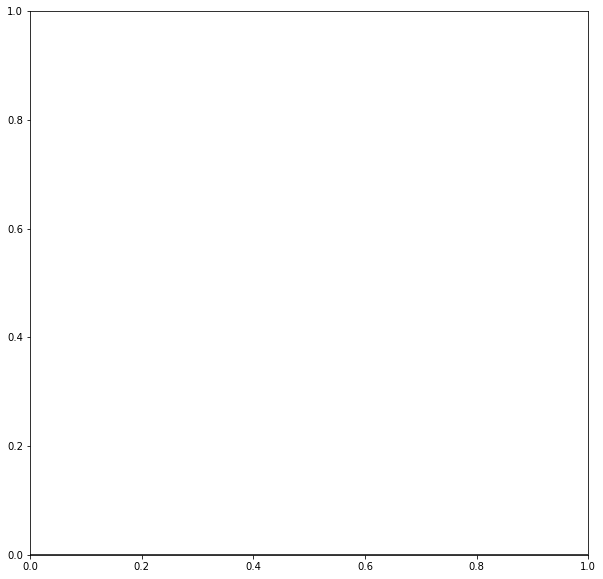

In [92]:
fig, axs = plt.subplots(1, 1, figsize=(10,10))
plt.axhline(y=0, color='black', linestyle='-')

x = ds_34_subset['time']
y = ds_34_subset['precip']
print(len(x))
print(len(y))
print(f'{type(x)}   {type(y)}')
#ax.scatter(x, y)
print(x)
print()
print(y)


#### (d.)  For rest of assignment, please use the UNSMOOTHED data from (a) as I believe that is what is used for these official NOAA analyses

![image.png](attachment:image.png)

### (3)  Great!  Now,  let's further process our data to prep it for correlation analysis, by evaluating the seasonal average of each SST and each precipitation for EACH year (NOT an average over all years)

In [100]:
print(sst_ds)
month_length = sst_ds.time.dt.days_in_month

# Calculate the weights by grouping by 'time.season'.
weights = (
    month_length.groupby("time.season") / month_length.groupby("time.season").sum()
)

# Test that the sum of the weights for each season is 1.0
np.testing.assert_allclose(weights.groupby("time.season").sum().values, np.ones(4))

# Calculate the weighted average
sst_ds_weighted = (sst_ds * weights).groupby("time.season").sum(dim="time")

ds_34_subset_yearly = ds_34_subset.groupby("time.year").mean()

<xarray.Dataset>
Dimensions:  (lat: 36, lon: 72, time: 1982)
Coordinates:
  * lat      (lat) float32 87.5 82.5 77.5 72.5 67.5 ... -72.5 -77.5 -82.5 -87.5
  * lon      (lon) float32 2.5 7.5 12.5 17.5 22.5 ... 342.5 347.5 352.5 357.5
  * time     (time) datetime64[ns] 1856-01-01 1856-02-01 ... 2021-02-01
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    title:          Kaplan Extended SST V2
    platform:       Analysis
    Conventions:    COARDS
    history:        Originally converted from the IRI format to netCDF3 10/20...
    dataset_title:  Kaplan Extended V2 SST anomaly data
    description:    Data is processed at Lamont-Doherty using an \noptimal an...
    References:     https://www.psl.noaa.gov/data/gridded/data.kaplan_sst.html


### (4)  To prepare you to set up the correlation in the next Q, print out the dimensions each of your seasonal precip + your seasonal SST variables.

In [102]:
print(sst_ds_weighted.dims)
print(ds_34_subset_yearly.dims)

Frozen({'lat': 36, 'lon': 72, 'season': 4})
Frozen({'year': 73, 'lat': 72, 'lon': 144})


### (5) Correlation time!
#### (a.) For each season, calculate the correlation between SST anomaly in Nino 3.4 (so, a time series)  and precip anomaly anywhere globally
- Xarray has a correlation function!

#### (b.) Plot for each season, zoomed in on the USA, with all four seasons one ONE plot (so - you're creating a panel plot consisting of 4 subplots)
- pick a colormap that will help you compare to the map in (d)

#### (c.)  In at least a few sentences, describe:
- i. what does a positive or negative correlation mean, physically, in your analysis?
- ii. for DJF, at least two striking patterns in the correlation map
- iii. for DJF, describe if those patterns are more likely in El Nino or La Nina years (remember what El Nino vs. La Nina tells us about the SST anomalies)
  - we could, but will not now, do all of the above explicitly using only El Nino or La Nina years, but we're keeping things more simple for now

#### (d.)  Confirm your DJF plot with the one produced by NOAA here.  Does yours look similar?

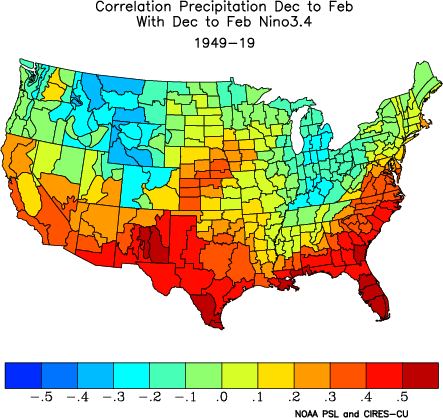 (Can't see image? Try: https://psl.noaa.gov/cgi-bin/data/usclimdivs/climdiv.corr.pl?variab=Precipitation&mon1=12&mon2=2&imonflag=0&iy%5B1%5D=&iy%5B2%5D=&type=8&timefile=&lagtype=0&ilead=0&ilag=0&xlow=&xhi=&xint=&Submit=Create+Plot)

In [ ]:
# (a) Now calculate the correlations!

# Sorry Alicia, this is as far as I got between work, school, and packing.
# Not my best work... I tried. Sorry. :/




In [ ]:
# (b) Plot them!






In [ ]:
# (c) Interpretation time!




In [ ]:
# (d) Does my plot look like the NOAA plot, approximately?





### (6)  We could have, alternatively, or additionally, in the above analysis taken into account El Nino vs. La Nina years explicitly and then analyzed relationships.....but we'll stop here for today